# 利用 PYTHON 进行全面的数据挖掘
Pedro Marcelino - February 2017


----------

<b>'生活中最困难的事情就是认识自己'</b>

这句话属于米利都的泰勒斯。泰勒斯是希腊/腓尼基哲学家，数学家和天文学家，被公认为西方文明中第一个懂得娱乐和从事科学思想的人。

This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

我不能说在数据科学里知道你的数据是最困难的事情，但它是很耗时的。 因此，很容易忽略这一初始步骤，并且太早跳进水里
I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

所以我试着学习如何游泳，然后跳入水中。在 "检查您的数据" 一章中, 我尽了最大的努力对数据进行全面而不是详尽的分析。
我并没有在这个内核中报告严谨的研究，但是我希望它对社区有帮助，所以我在分享我如何将一些数据分析原则应用到这个问题上。
So I tried to learn how to swim before jumping into the water. Based on Hair et al. (2013), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

尽管我给这些章节取了一些奇怪的名字, 但我们在这个内核中所做的事情是这样的:
Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:

1. <b>理解问题</b>。我们将研究每个变量，并对它们的意义和重要性进行分析。
2. <b>单变量研究</ b>。 我们将专注于因变量（“销售价格”），并尝试更多地了解它。
3. <b>多变量学习</ b>。 我们将尝试了解因变量和自变量如何相关。
4. <b> 基本清洗 </b>。我们将清理数据集并处理丢失的信息、离群值和分类变量。
5. <b> 测试假设 </b>。我们将检查我们的数据是否符合大多数多元技术所要求的假设。

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.

现在是时候玩得开心了！

Now, it's time to have fun!

In [33]:
#邀请人们参加 Kaggle 聚会
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#导入训练数据
df_train = pd.read_csv('input/train.csv')

In [3]:
#检查数据
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 1. So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:
* <b>Variable</b> - Variable name.
* <b>Type</b> - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* <b>Segment</b> - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
* <b>Expectation</b> - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* <b>Conclusion</b> - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* <b>Comments</b> - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectactions, so I think we achieved our goal. Now it's time for 'a little less conversation, a little more action please'. Let's <b>shake it!</b>

# 2. First things first: analysing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

*Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:*

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

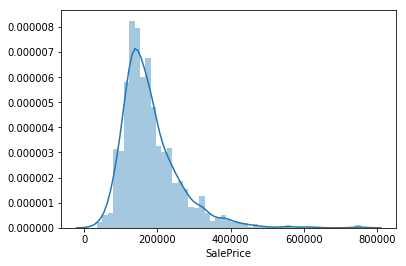

In [5]:
#直方图
#histogram
sns.distplot(df_train['SalePrice']);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

# 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!*

*To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

### Relationship with numerical variables

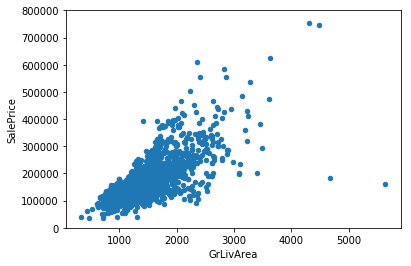

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a <b>linear relationship.</b>*

*And what about 'TotalBsmtSF'?*

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a <b>strong linear (exponential?)</b> reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

### Relationship with categorical features

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

<b>Note</b>: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

### In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

# 3. Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

### The 'plasma soup'

'In the very beginning there was nothing except for a plasma soup. What is known of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.' (source: http://umich.edu/~gs265/bigbang.htm) 

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

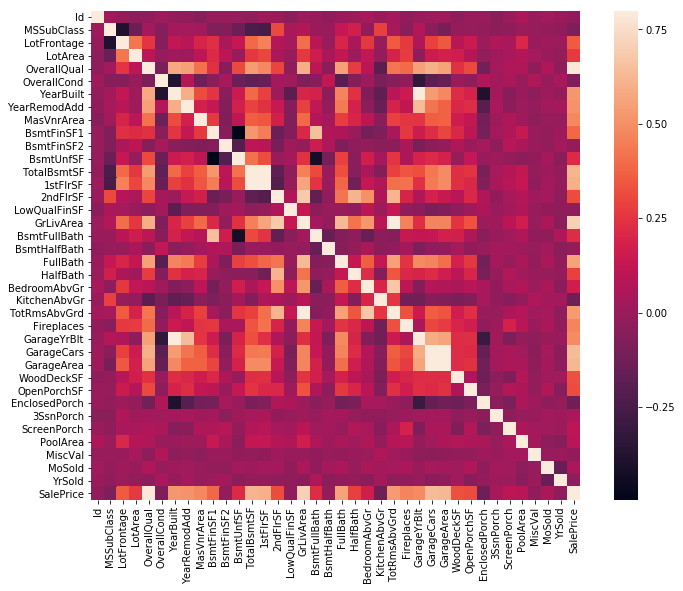

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

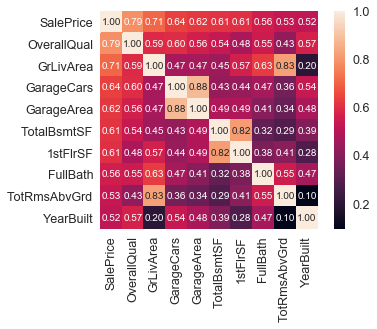

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing. Once more, thank you @seaborn! You make me 'move like Jagger'!

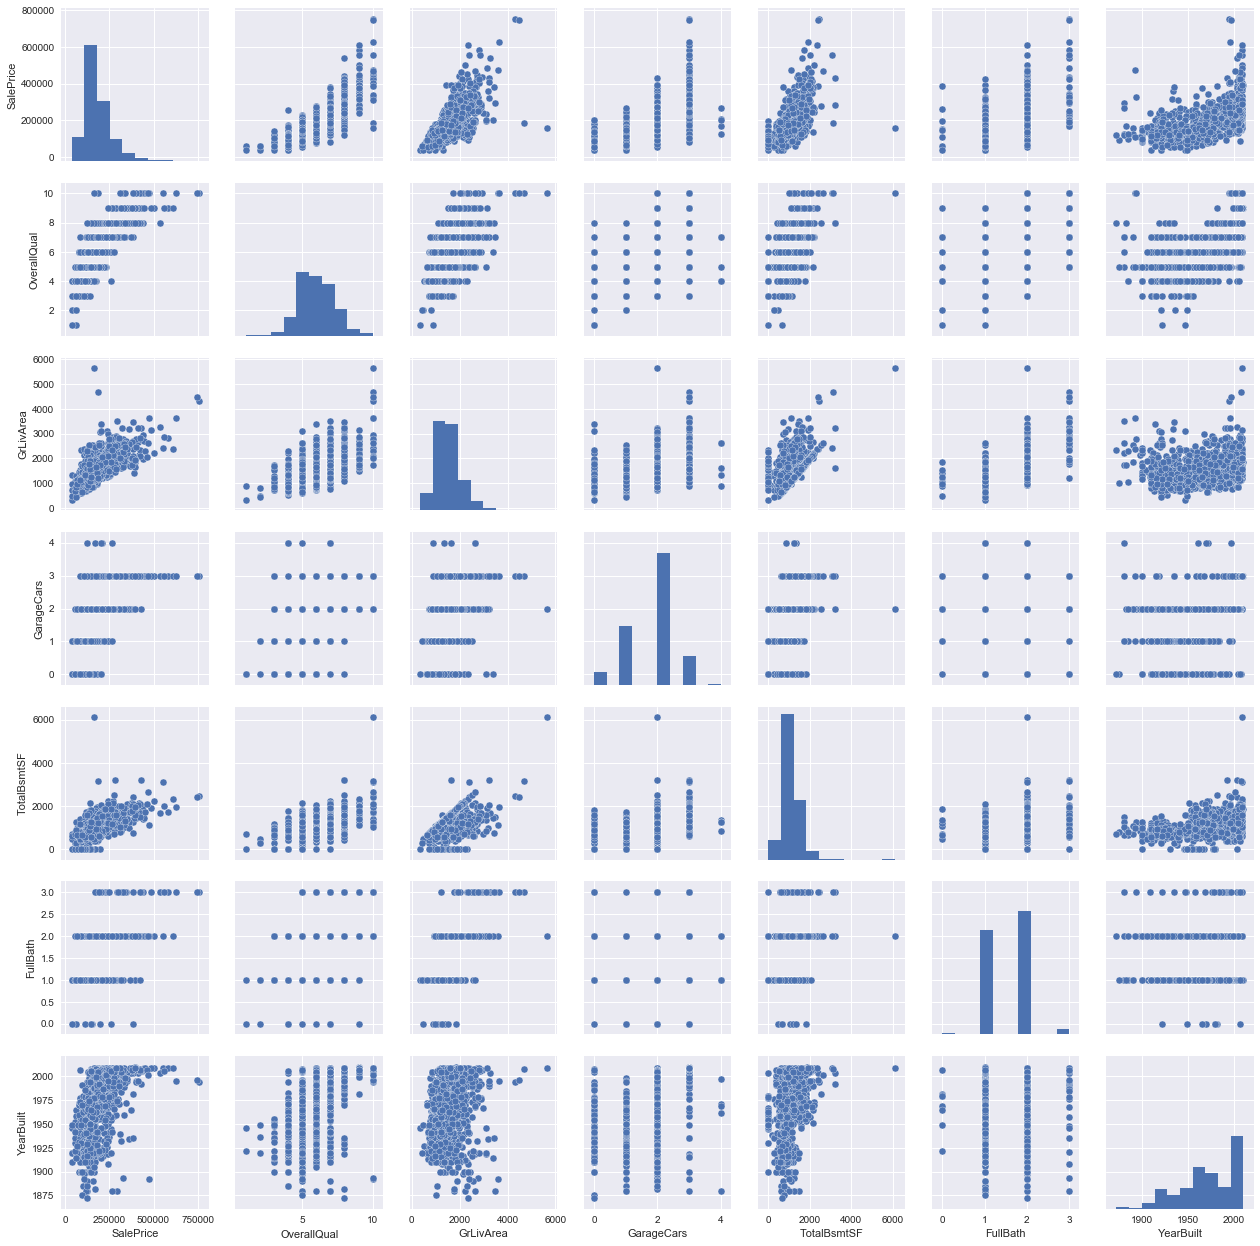

In [13]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

# 4. Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [14]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [15]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, 'a change in perspective is worth 80 IQ points'.

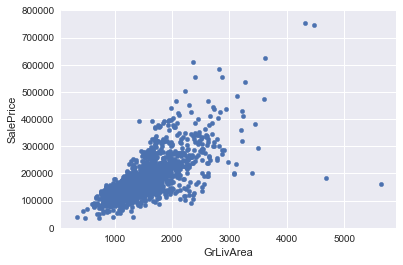

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [18]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

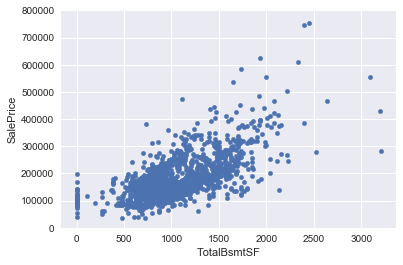

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

# 5. Getting hard core

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution.

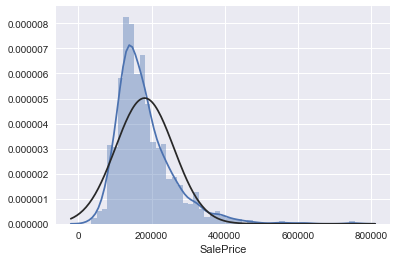

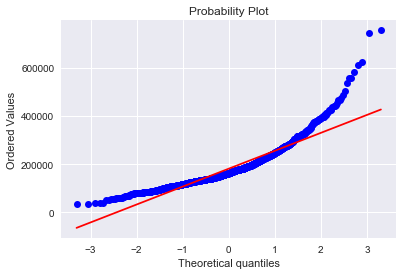

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

*Avada kedavra!*

In [21]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

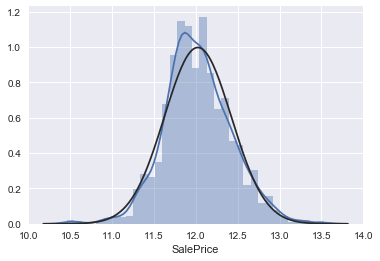

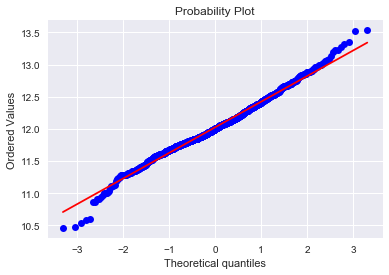

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

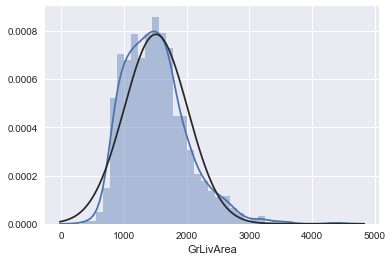

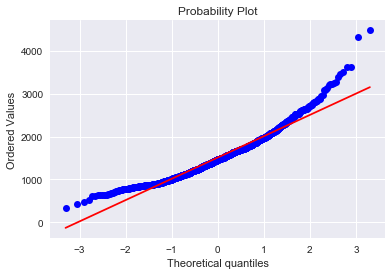

In [23]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Tastes like skewness... *Avada kedavra!*

In [24]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

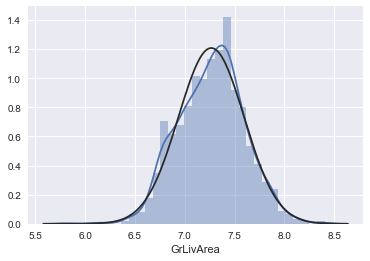

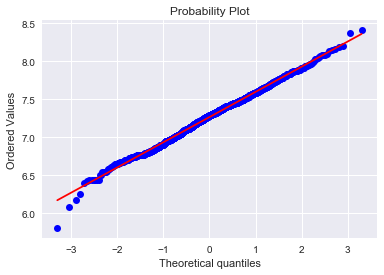

In [25]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

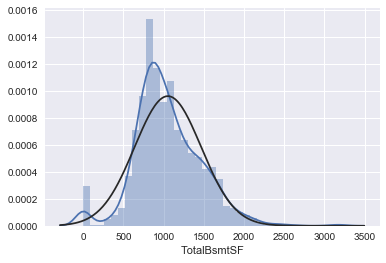

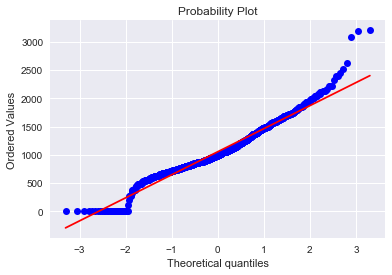

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [27]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

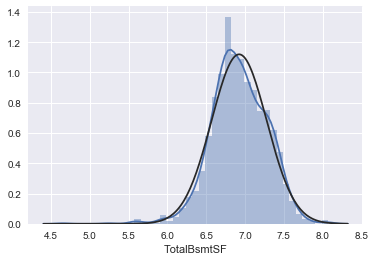

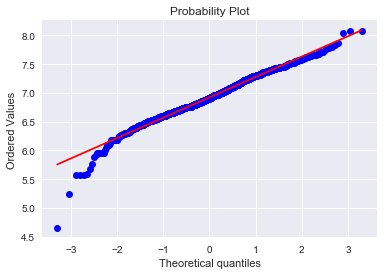

In [29]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

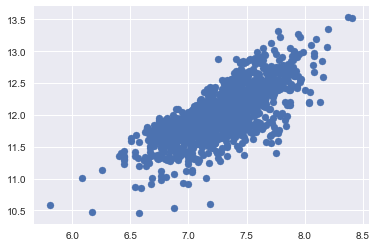

In [30]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

In [31]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# Last but not the least, dummy variables

Easy mode.

In [32]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

# Conclusion

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by Hair et al. (2013). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

But the quest is not over. Remember that our story stopped in the Facebook research. Now it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

It's up to you to find out.

# <b>References</b>
* Hair et al., 2013, Multivariate Data Analysis, 7th Edition (https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/0138132631)

# Acknowledgements

<b>Thanks</b> to João Rico for reading drafts of this.

In [47]:
print(type(df_train))
print(df_train.shape)
tf_train = df_train
salePrice = tf_train.SalePrice
train_labels = np.reshape(salePrice, [-1, 1])

<class 'pandas.core.frame.DataFrame'>
(1457, 222)


In [74]:
from sklearn.feature_selection import SelectKBest,f_regression
X_new = SelectKBest(f_regression, k=10).fit_transform(tf_train, train_labels)
print(X_new)

[[  7.00000000e+00   2.00300000e+03   2.00300000e+03 ...,   5.48000000e+02
    0.00000000e+00   0.00000000e+00]
 [  6.00000000e+00   1.97600000e+03   1.97600000e+03 ...,   4.60000000e+02
    1.00000000e+00   1.00000000e+00]
 [  7.00000000e+00   2.00100000e+03   2.00200000e+03 ...,   6.08000000e+02
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  7.00000000e+00   1.94100000e+03   2.00600000e+03 ...,   2.52000000e+02
    0.00000000e+00   0.00000000e+00]
 [  5.00000000e+00   1.95000000e+03   1.99600000e+03 ...,   2.40000000e+02
    1.00000000e+00   0.00000000e+00]
 [  5.00000000e+00   1.96500000e+03   1.96500000e+03 ...,   2.76000000e+02
    0.00000000e+00   1.00000000e+00]]


In [68]:
tf_train_new = X_new

print(tf_train_new.shape)
print(type(tf_train_new))

test = pd.read_csv("input/test.csv")
ids = test['Id']


(1457, 10)
<class 'numpy.ndarray'>


In [35]:
import tensorflow as tf

In [36]:
def savecsv(test_prediction_np, filename="submission_tf_2lnn.csv"):
#     np.savetxt('submission_tf_titanic.csv', 
#            np.c_[range(1,len(x_test)+1),test_prediction_np], 
#            delimiter=',', 
#            header = 'PassengerId,Survived', 
#            comments = '', 
#            fmt='%d')
    StackingSubmission = pd.DataFrame({'Id': ids,'SalePrice': test_prediction_np })
    StackingSubmission.to_csv(filename, index=False)

In [37]:
def add_layer(inputs, input_size, output_size, activation_function=None):
    with tf.variable_scope("Weights"):
        Weights = tf.Variable(tf.random_normal(shape=[input_size, output_size]), name="weights")
    with tf.variable_scope("biases"):
        biases = tf.Variable(tf.zeros(shape=[1, output_size]) + 0.1, name="biases")
    with tf.name_scope("Wx_plus_b"):
        inputs = tf.to_float(inputs)
        Wx_plus_b = tf.matmul(inputs, Weights) + biases
#     with tf.name_scope("dropout"):
#         Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob=keep_prob_s)
    if activation_function is None:
        return Wx_plus_b
    else:
        with tf.name_scope("activation_function"):
            return activation_function(Wx_plus_b)

In [73]:
batch_size = 64  
regularation_param = 0.0001  
keep_prob = 1
graph = tf.Graph()  
num_labels = 2
hidden_nodes = 512
dimension = tf_train_new.shape[1]

with graph.as_default():
    # -----------------------------------------1
    # 输入 
    tf_train_dataset = tf.placeholder(tf.float32, shape=(None, dimension), name="tf_train_dataset")
    tf_train_labels = tf.placeholder(tf.float32, shape=(None, 1), name="tf_train_labels")
    keep_prob_s = tf.placeholder(dtype=tf.float32)
#     print("X_tr.shape[1])",X_tr.shape[1])
    # 创建一个常量张量
#     tf_valid_dataset = tf.constant(X_val)
#     tf_test_dataset = tf.constant(X_test)
    
    #转数据类型，f64->f32
    tf_train_dataset = tf.to_float(tf_train_dataset)
#     tf_valid_dataset = tf.to_float(tf_valid_dataset)
#     tf_test_dataset = tf.to_float(tf_test_dataset)

    
    weights1 = tf.Variable(tf.truncated_normal([tf_train.shape[1], 10]))
    biases1 = tf.Variable(tf.zeros([10]))

    weights2 = tf.Variable(tf.truncated_normal([10, 1]))
    biases2 = tf.Variable(tf.zeros([1]))
    
    
    l1 = add_layer(tf_train_dataset, dimension, 10, activation_function=tf.nn.relu)
    out = add_layer(l1, 10, 1)
    train_logits = out
    
#     l1 = add_layer(X_val, dimension, 10, activation_function=tf.nn.relu)
#     out = add_layer(l1, 10, 1)
#     valid_logits = out
    
    l1 = add_layer(test, dimension, 10, activation_function=tf.nn.relu)
#     out = add_layer(l1, 10, 1)
#     test_logits = out
    
    
    #DropOut
#     drop = tf.nn.dropout(tf_train_dataset, keep_prob=keep_prob)
    
    # 训练计算.
#     train_logits = tf.matmul(tf_train_dataset, weights) + biases
#     valid_logits = tf.matmul(tf_valid_dataset, weights) + biases
#     test_logits = tf.matmul(tf_test_dataset, weights) + biases

#     train_logits = tf.add(tf.matmul(tf_train_dataset, weights1),biases1)
#     train_logits = tf.nn.relu(train_logits)
#     train_logits = tf.add(tf.matmul(train_logits,weights2),biases2)

#     valid_logits = tf.add(tf.matmul(tf_valid_dataset, weights1),biases1)
#     valid_logits = tf.nn.relu(valid_logits)
#     valid_logits = tf.add(tf.matmul(valid_logits,weights2),biases2)

#     test_logits = tf.add(tf.matmul(tf_test_dataset, weights1),biases1)
#     test_logits = tf.nn.relu(test_logits)
#     test_logits = tf.add(tf.matmul(test_logits,weights2),biases2)
    

    loss = tf.reduce_mean(tf.reduce_sum(tf.square(tf_train_labels - train_logits), axis=[1]))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
    
    train_prediction = tf.nn.softmax(train_logits)
#     valid_prediction = tf.nn.softmax(valid_logits)
#     test_prediction = tf.nn.softmax(test_logits)

TypeError: Failed to convert object of type <class 'pandas.core.frame.DataFrame'> to Tensor. Contents:       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
5             60       RL         75.0    10000   Pave   NaN      IR1   
6             20       RL          NaN     7980   Pave   NaN      IR1   
7             60       RL         63.0     8402   Pave   NaN      IR1   
8             20       RL         85.0    10176   Pave   NaN      Reg   
9             20       RL         70.0     8400   Pave   NaN      Reg   
10           120       RH         26.0     5858   Pave   NaN      IR1   
11           160       RM         21.0     1680   Pave   NaN      Reg   
12           160       RM         21.0     1680   Pave   NaN      Reg   
13           160       RL         24.0     2280   Pave   NaN      Reg   
14           120       RL         24.0     2280   Pave   NaN      Reg   
15            60       RL        102.0    12858   Pave   NaN      IR1   
16            20       RL         94.0    12883   Pave   NaN      IR1   
17            20       RL         90.0    11520   Pave   NaN      Reg   
18            20       RL         79.0    14122   Pave   NaN      IR1   
19            20       RL        110.0    14300   Pave   NaN      Reg   
20            60       RL        105.0    13650   Pave   NaN      Reg   
21           120       RL         41.0     7132   Pave   NaN      IR1   
22            20       RL        100.0    18494   Pave   NaN      IR1   
23           120       RL         43.0     3203   Pave   NaN      Reg   
24            80       RL         67.0    13300   Pave   NaN      IR1   
25            60       RL         63.0     8577   Pave   NaN      IR1   
26            60       RL         60.0    17433   Pave   NaN      IR2   
27            20       RL         73.0     8987   Pave   NaN      Reg   
28            20       FV         92.0     9215   Pave   NaN      Reg   
29            20       FV         84.0    10440   Pave   NaN      Reg   
...          ...      ...          ...      ...    ...   ...      ...   
1429          30       RM         50.0     7030   Pave   NaN      Reg   
1430          50       RM         75.0     9060   Pave   NaN      Reg   
1431          30  C (all)         69.0    12366   Pave   NaN      Reg   
1432         190  C (all)         50.0     9000   Pave   NaN      Reg   
1433          50  C (all)         60.0     8520   Grvl   NaN      Reg   
1434         120       RM         41.0     5748   Pave   NaN      IR1   
1435         120       RM         44.0     3842   Pave   NaN      IR1   
1436          20       RL         69.0    23580   Pave   NaN      IR1   
1437          90       RL         65.0     8385   Pave   NaN      Reg   
1438          20       RL         70.0     9116   Pave   NaN      Reg   
1439          80       RL        140.0    11080   Pave   NaN      Reg   
1440          20       RL          NaN    50102   Pave   NaN      IR1   
1441          20       RL          NaN     8098   Pave   NaN      IR1   
1442          20       RL         95.0    13618   Pave   NaN      Reg   
1443          20       RL         88.0    11577   Pave   NaN      Reg   
1444          20      NaN        125.0    31250   Pave   NaN      Reg   
1445          90       RM         78.0     7020   Pave   NaN      Reg   
1446         160       RM         41.0     2665   Pave   NaN      Reg   
1447          20       RL         58.0    10172   Pave   NaN      IR1   
1448          90       RL          NaN    11836   Pave   NaN      IR1   
1449         180       RM         21.0     1470   Pave   NaN      Reg   
1450         160       RM         21.0     1484   Pave   NaN      Reg   
1451          20       RL         80.0    13384   Pave   NaN      Reg   
1452         160       RM         21.0     1533   Pave   NaN      Reg   
1453         160       RM         21.0     1526   Pave   NaN      Reg   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig      ...       ScreenPorch PoolArea  \
0            Lvl    AllPub    Inside      ...               120        0   
1            Lvl    AllPub    Corner      ...                 0        0   
2            Lvl    AllPub    Inside      ...                 0        0   
3            Lvl    AllPub    Inside      ...                 0        0   
4            HLS    AllPub    Inside      ...               144        0   
5            Lvl    AllPub    Corner      ...                 0        0   
6            Lvl    AllPub    Inside      ...                 0        0   
7            Lvl    AllPub    Inside      ...                 0        0   
8            Lvl    AllPub    Inside      ...                 0        0   
9            Lvl    AllPub    Corner      ...                 0        0   
10           Lvl    AllPub       FR2      ...                 0        0   
11           Lvl    AllPub    Inside      ...                 0        0   
12           Lvl    AllPub    Inside      ...                 0        0   
13           Lvl    AllPub       FR2      ...                 0        0   
14           Lvl    AllPub       FR2      ...                 0        0   
15           Lvl    AllPub    Inside      ...                 0        0   
16           Lvl    AllPub    Corner      ...                 0        0   
17           Lvl    AllPub    Inside      ...                 0        0   
18           Lvl    AllPub    Inside      ...                 0        0   
19           HLS    AllPub    Inside      ...                 0        0   
20           Lvl    AllPub    Corner      ...                 0        0   
21           Lvl    AllPub    Inside      ...                 0        0   
22           Lvl    AllPub    Corner      ...                 0        0   
23           Lvl    AllPub    Inside      ...                 0        0   
24           Lvl    AllPub    Inside      ...                 0        0   
25           Lvl    AllPub    Inside      ...                 0        0   
26           Lvl    AllPub   CulDSac      ...               256        0   
27           Lvl    AllPub    Inside      ...                 0        0   
28           Lvl    AllPub    Inside      ...                 0        0   
29           Lvl    AllPub    Corner      ...               216        0   
...          ...       ...       ...      ...               ...      ...   
1429         Lvl    AllPub    Inside      ...                 0        0   
1430         Lvl    AllPub    Inside      ...                 0        0   
1431         Lvl    AllPub    Inside      ...                 0        0   
1432         Lvl    AllPub    Inside      ...                 0        0   
1433         Bnk    AllPub    Inside      ...                 0        0   
1434         HLS    AllPub    Inside      ...               153        0   
1435         HLS    AllPub    Inside      ...               155        0   
1436         Lvl    AllPub    Inside      ...                 0        0   
1437         Lvl    AllPub    Inside      ...                 0        0   
1438         Lvl    AllPub    Corner      ...                 0        0   
1439         Lvl    AllPub    Corner      ...                 0        0   
1440         Low    AllPub    Inside      ...               138        0   
1441         Lvl    AllPub    Inside      ...                 0        0   
1442         Lvl    AllPub    Corner      ...                 0        0   
1443         Lvl    AllPub    Inside      ...                 0        0   
1444         Lvl    AllPub    Inside      ...                 0        0   
1445         Lvl    AllPub    Inside      ...                 0        0   
1446         Lvl    AllPub    Inside      ...                 0        0   
1447         Lvl    AllPub    Inside      ...                 0        0   
1448         Lvl    AllPub    Corner      ...                 0        0   
1449         Lvl    AllPub    Inside      ...                 0        0   
1450         Lvl    AllPub    Inside      ...                 0        0   
1451         Lvl    AllPub    Inside      ...                 0        0   
1452         Lvl    AllPub    Inside      ...                 0        0   
1453         Lvl    AllPub    Inside      ...                 0        0   
1454         Lvl    AllPub    Inside      ...                 0        0   
1455         Lvl    AllPub    Inside      ...                 0        0   
1456         Lvl    AllPub    Inside      ...                 0        0   
1457         Lvl    AllPub    Inside      ...                 0        0   
1458         Lvl    AllPub    Inside      ...                 0        0   

     PoolQC  Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  \
0       NaN  MnPrv         NaN       0       6    2010        WD   
1       NaN    NaN        Gar2   12500       6    2010        WD   
2       NaN  MnPrv         NaN       0       3    2010        WD   
3       NaN    NaN         NaN       0       6    2010        WD   
4       NaN    NaN         NaN       0       1    2010        WD   
5       NaN    NaN         NaN       0       4    2010        WD   
6       NaN  GdPrv        Shed     500       3    2010        WD   
7       NaN    NaN         NaN       0       5    2010        WD   
8       NaN    NaN         NaN       0       2    2010        WD   
9       NaN  MnPrv         NaN       0       4    2010        WD   
10      NaN    NaN         NaN       0       6    2010        WD   
11      NaN    NaN         NaN       0       2    2010       COD   
12      NaN    NaN         NaN       0       3    2010        WD   
13      NaN    NaN         NaN       0       6    2010        WD   
14      NaN    NaN         NaN       0       6    2010        WD   
15      NaN    NaN         NaN       0       1    2010       New   
16      NaN    NaN         NaN       0       6    2010       New   
17      NaN    NaN         NaN       0       6    2010        WD   
18      NaN    NaN         NaN       0       2    2010        WD   
19      NaN    NaN         NaN       0       6    2010        WD   
20      NaN    NaN         NaN       0       6    2010        WD   
21      NaN    NaN         NaN       0       4    2010        WD   
22      NaN    NaN         NaN       0       1    2010        WD   
23      NaN    NaN         NaN       0       1    2010        WD   
24      NaN    NaN         NaN       0       6    2010        WD   
25      NaN    NaN         NaN       0       4    2010        WD   
26      NaN    NaN         NaN       0       1    2010        WD   
27      NaN    NaN         NaN       0       5    2010        WD   
28      NaN    NaN         NaN       0       4    2010       New   
29      NaN    NaN         NaN       0       5    2010        WD   
...     ...    ...         ...     ...     ...     ...       ...   
1429    NaN  MnPrv         NaN       0       3    2006        WD   
1430    NaN    NaN         NaN       0       4    2006        WD   
1431    NaN    NaN         NaN       0      10    2006        WD   
1432    NaN    NaN         NaN       0      10    2006        WD   
1433    NaN    NaN         NaN       0       4    2006        WD   
1434    NaN    NaN         NaN       0       2    2006       New   
1435    NaN    NaN         NaN       0      12    2006        WD   
1436    NaN    NaN         NaN       0       9    2006        WD   
1437    NaN    NaN         NaN       0      10    2006        WD   
1438    NaN    NaN         NaN       0       5    2006        WD   
1439    NaN    NaN         NaN       0       5    2006        WD   
1440    NaN    NaN         NaN       0       3    2006        WD   
1441    NaN    NaN         NaN       0      10    2006        WD   
1442    NaN    NaN         NaN       0      11    2006       New   
1443    NaN    NaN         NaN       0       9    2006       New   
1444    NaN    NaN         NaN       0       5    2006        WD   
1445    NaN    NaN         NaN       0      11    2006        WD   
1446    NaN    NaN         NaN       0       5    2006        WD   
1447    NaN    NaN         NaN       0      10    2006        WD   
1448    NaN    NaN         NaN       0       3    2006        WD   
1449    NaN    NaN         NaN       0       4    2006        WD   
1450    NaN    NaN         NaN       0       5    2006        WD   
1451    NaN    NaN         NaN       0       5    2006        WD   
1452    NaN    NaN         NaN       0      12    2006        WD   
1453    NaN  GdPrv         NaN       0       6    2006        WD   
1454    NaN    NaN         NaN       0       6    2006        WD   
1455    NaN    NaN         NaN       0       4    2006        WD   
1456    NaN    NaN         NaN       0       9    2006        WD   
1457    NaN  MnPrv        Shed     700       7    2006        WD   
1458    NaN    NaN         NaN       0      11    2006        WD   

      SaleCondition  
0            Normal  
1            Normal  
2            Normal  
3            Normal  
4            Normal  
5            Normal  
6            Normal  
7            Normal  
8            Normal  
9            Normal  
10           Normal  
11           Normal  
12           Normal  
13           Normal  
14           Normal  
15          Partial  
16          Partial  
17           Normal  
18           Normal  
19           Normal  
20           Normal  
21           Normal  
22           Normal  
23           Normal  
24           Normal  
25           Normal  
26           Normal  
27           Normal  
28          Partial  
29           Normal  
...             ...  
1429         Normal  
1430         Normal  
1431        Abnorml  
1432        Abnorml  
1433         Normal  
1434        Partial  
1435         Normal  
1436         Normal  
1437         Normal  
1438         Normal  
1439         Normal  
1440         Alloca  
1441         Normal  
1442        Partial  
1443        Partial  
1444         Normal  
1445         Normal  
1446         Normal  
1447         Normal  
1448         Normal  
1449         Normal  
1450         Normal  
1451         Normal  
1452        Abnorml  
1453         Normal  
1454         Normal  
1455        Abnorml  
1456        Abnorml  
1457         Normal  
1458         Normal  

[1459 rows x 79 columns]. Consider casting elements to a supported type.

In [66]:
num_steps = 15001

# X_tr_tf = X_tr.values
# X_val_tf = X_val.values 
# y_tr_tf = y_tr.values 
# y_val_tf = y_val.values 

# train_labels = np.reshape(y_tr_tf, [-1, 1])
# val_labels = np.reshape(y_val_tf, [-1, 1])
# print("X_test.shape",X_test.shape)
# print("X_tr_tf.shape",X_tr_tf.shape)
# print("X_val_tf.shape",X_val_tf.shape)
# # print("type(X_tr_tf)",type(X_tr_tf))
# # print("type(X_val_tf)",type(X_val_tf))

# print("y_tr_tf.shape",y_tr_tf.shape)
# print("y_val_tf.shape",y_val_tf.shape)
# # print("type(y_tr_tf)",type(y_tr_tf))
# # print("type(y_val_tf)",type(y_val_tf))

# print("valid_labels.shape",valid_labels.shape)

# print("y_tr_tf",y_tr_tf)
# print("y_tr.shape",y_tr.shape)
with tf.Session(graph=graph) as session:
    # 这是一个一次性操作，可以确保参数按照我们在图中描述的初始化：矩阵的随机权重，偏差为零。
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the biases. 
    tf.global_variables_initializer().run()
#     offset = (step * batch_size) % (y_tr.shape[0] - batch_size)  
#     print("offset + batch_size=",offset + batch_size)
#     print("offset=",offset)
#     print("type(X_tr)=",type(X_tr))
#     batch_data = X_tr_tf[offset:(offset + batch_size), :]  
#     batch_labels = train_labels[offset:(offset + batch_size), :]  
#     print("batch_data.shape", batch_data.shape)
#     print("batch_labels.shape", batch_labels.shape)
    
    
#     feed_dict = {tf_train_dataset : X_tr_tf, tf_train_labels : train_labels}  
    feed_dict = {tf_train_dataset : tf_train_new, tf_train_labels : train_labels}  
#     feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}  
#     feed_dict_valid = {tf_train_dataset : X_val_tf, tf_train_labels : y_val_tf}  
#     feed_dict_test = {tf_train_dataset : X_test}  
#     print("X_tr_tf",X_tr_tf.shape)
#     print("train_labels",train_labels.shape)
#     print('Initialized')
    for step in range(num_steps):
    # 运行计算。我们用.run()运行优化
    # Run the computations. We tell .run() that we want to run the optimizer,
    # 获取损失值和训练预测返回到numpy数组
    # and get the loss value and the training predictions returned as numpy arrays.
#         _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        if step % 100 == 0:
            print('Loss at step %d: %f' % (step, l))
            t_pred = session.run(train_logits, feed_dict=feed_dict)
#             v_pred = session.run(valid_logits, feed_dict=feed_dict)
    t_pred = session.run(test_logits, feed_dict=feed_dict_test)
    
    test_prediction_np = test_prediction.eval()
#     print("t_pred",t_pred)
    test_prediction_np = np.exp(t_pred)
#     price = test_prediction_np.reshape(len(test_prediction_np))
#     print("test_prediction_np",test_prediction_np[0])
#     print("test_prediction_np.shpe",test_prediction_np.shape)
#     print("x.shpe",x.shape)
#     print("x",x)
#     print("test_prediction_np.shape",test_prediction_np.shape)
    savecsv(price,"submission_tf_2lnn.csv")
    
print("Complete")

ValueError: Fetch argument <tf.Operation 'Adam' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "Adam"
op: "NoOp"
input: "^Adam/update_Weights/weights/ApplyAdam"
input: "^Adam/update_biases/biases/ApplyAdam"
input: "^Adam/update_Weights_1/weights/ApplyAdam"
input: "^Adam/update_biases_1/biases/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"
 is not an element of this graph.)